# Loan Application Approval Prediction

In [1]:
import pandas as pd
import numpy as np
import pickle


### Loading the dataset
df = pd.read_csv('loan_prediction.csv')

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,523,360,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,Yes


In [3]:
# Returns number of rows and columns of the dataset
df.shape

(614, 13)

In [4]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 62.5+ KB


In [6]:
# Returns a column having null values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Loan_Amount_Term'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

['Male' 'Female']
['No' 'Yes']
[0 1 2 3]
['Graduate' 'Not Graduate']
['No' 'Yes']
[360 120 240 180 480 300]
['Urban' 'Rural' 'Semiurban']
['Yes' 'No']


In [9]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,564.000000
mean,0.775244,5403.459283,1621.245798,149.534202,343.973941,0.842199
std,1.014563,6109.041673,2926.248369,90.693313,62.361149,0.364878
min,0.000000,150.000000,0.000000,9.000000,120.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,2.000000,5795.000000,2297.250000,170.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
# Rearranging coloumns
df = df[['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount',
                  'Loan_Amount_Term', 'Property_Area']]

In [11]:
df.head()

,Loan_Status,ApplicantIncome,CoapplicantIncome,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area
0,Yes,5849,0.0,Male,No,0,Graduate,No,523,360,Urban
1,No,4583,1508.0,Male,Yes,1,Graduate,No,128,360,Rural
2,Yes,3000,0.0,Male,Yes,0,Graduate,Yes,66,360,Urban
3,Yes,2583,2358.0,Male,Yes,0,Not Graduate,No,120,360,Urban
4,Yes,6000,0.0,Male,No,0,Graduate,No,141,360,Urban


In [12]:
# Replace with Yes as 1 and No as 0
df['Loan_Status'].replace('Yes', 1,inplace=True)
df['Loan_Status'].replace('No', 0,inplace=True)

In [13]:
df.head()

,Loan_Status,ApplicantIncome,CoapplicantIncome,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area
0,1,5849,0.0,Male,No,0,Graduate,No,523,360,Urban
1,0,4583,1508.0,Male,Yes,1,Graduate,No,128,360,Rural
2,1,3000,0.0,Male,Yes,0,Graduate,Yes,66,360,Urban
3,1,2583,2358.0,Male,Yes,0,Not Graduate,No,120,360,Urban
4,1,6000,0.0,Male,No,0,Graduate,No,141,360,Urban


In [14]:
# Importing essential libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

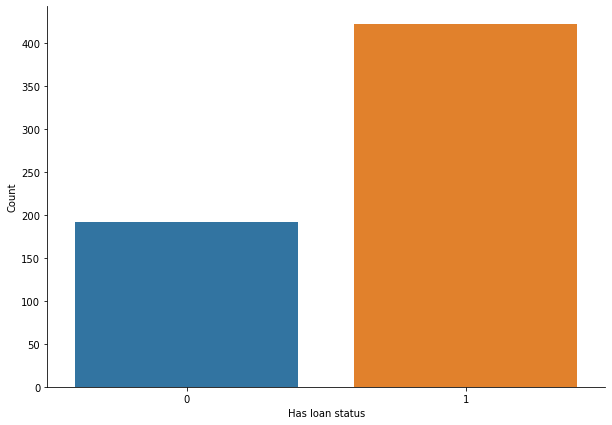

In [15]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Loan_Status', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has loan status')
plt.ylabel('Count')

plt.show()

In [16]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
df = pd.get_dummies(df,drop_first=True)

In [17]:
df.head()

,Loan_Status,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,5849,0.0,0,523,360,1,0,0,0,0,1
1,0,4583,1508.0,1,128,360,1,1,0,0,0,0
2,1,3000,0.0,0,66,360,1,1,0,1,0,1
3,1,2583,2358.0,0,120,360,1,1,1,0,0,1
4,1,6000,0.0,0,141,360,1,0,0,0,0,1


In [18]:
# Return correlation in between independent and dependent Features
df.corr()

,Loan_Status,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_Status,1.000000,-0.004710,-0.059187,0.009866,-0.051539,-0.051702,0.021932,0.086673,-0.085884,-0.010881,0.136540,-0.043621
ApplicantIncome,-0.004710,1.000000,-0.116605,0.115540,0.508377,-0.057178,0.030341,0.052845,-0.140760,0.136080,-0.014246,-0.000598
CoapplicantIncome,-0.059187,-0.116605,1.000000,0.028323,0.180281,-0.057660,0.077482,0.078689,-0.062290,0.036632,-0.027044,0.022776
Dependents,0.009866,0.115540,0.028323,1.000000,0.129506,-0.091058,0.158129,0.335712,0.062689,0.040960,-0.005403,0.004789
LoanAmount,-0.051539,0.508377,0.180281,0.129506,1.000000,0.016763,0.088975,0.132843,-0.143875,0.098709,-0.023869,0.007080
Loan_Amount_Term,-0.051702,-0.057178,-0.057660,-0.091058,0.016763,1.000000,-0.067440,-0.129621,-0.095712,-0.062288,0.084786,-0.120315
Gender_Male,0.021932,0.030341,0.077482,0.158129,0.088975,-0.067440,1.000000,0.344236,0.061540,-0.048857,-0.113946,0.030410
Married_Yes,0.086673,0.052845,0.078689,0.335712,0.132843,-0.129621,0.344236,1.000000,0.015886,-0.020248,0.004137,-0.001941
Education_Not Graduate,-0.085884,-0.140760,-0.062290,0.062689,-0.143875,-0.095712,0.061540,0.015886,1.000000,-0.030530,-0.039410,-0.034279
Self_Employed_Yes,-0.010881,0.136080,0.036632,0.040960,0.098709,-0.062288,-0.048857,-0.020248,-0.030530,1.000000,0.001379,0.004198


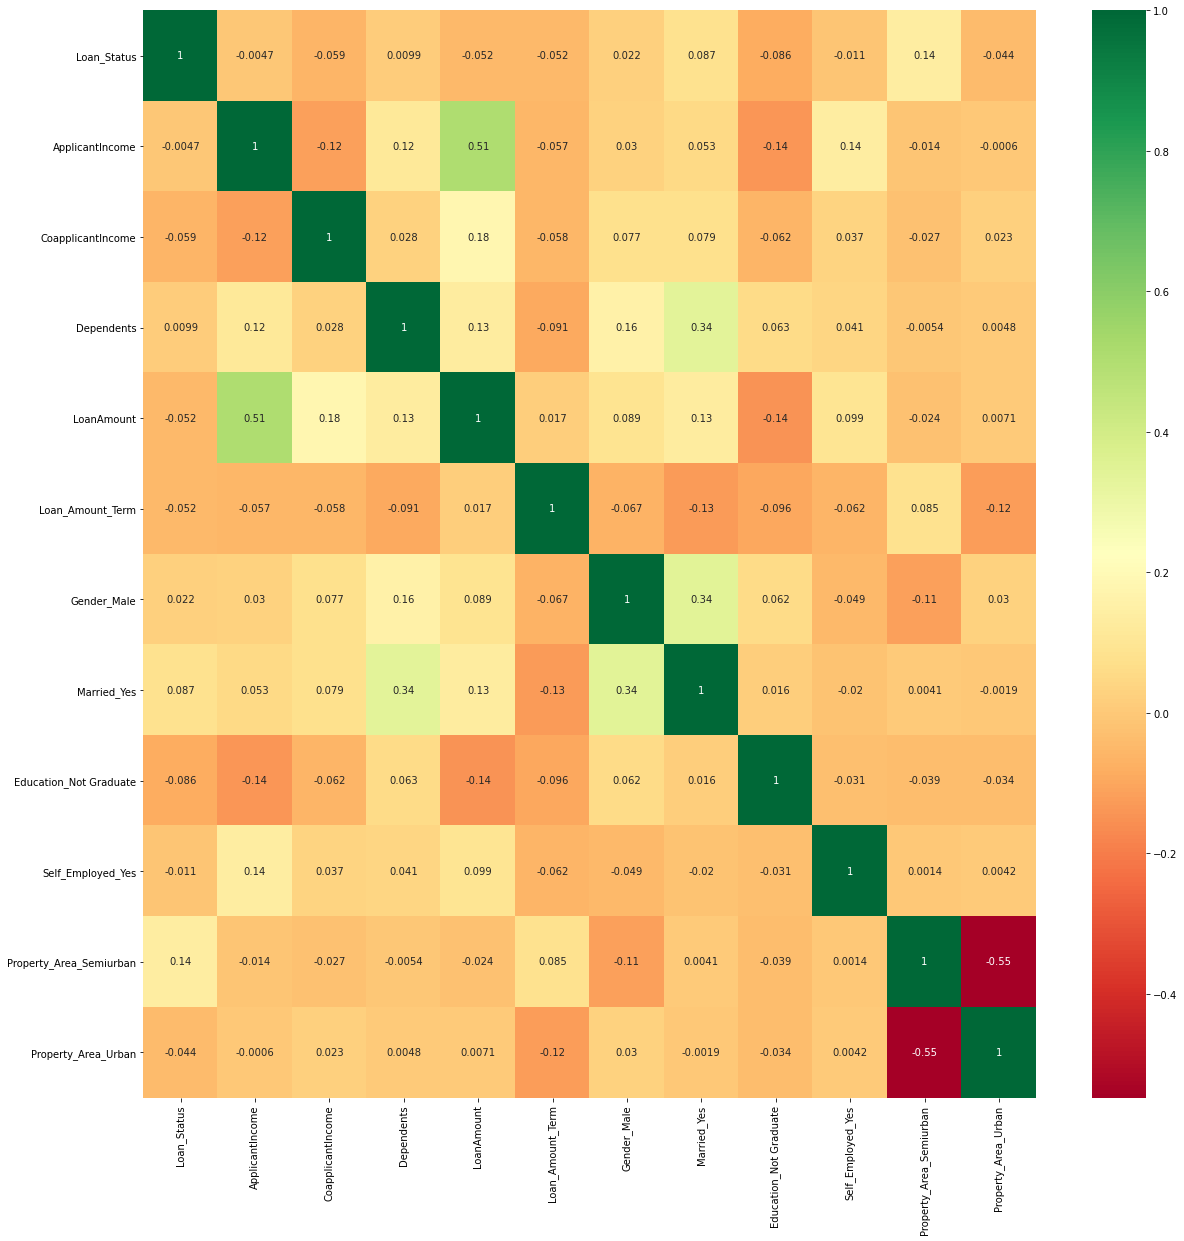

In [19]:
# Selecting correlated features using Heatmap
# Get correlation of all the features of the dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [20]:
df.head()

,Loan_Status,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,5849,0.0,0,523,360,1,0,0,0,0,1
1,0,4583,1508.0,1,128,360,1,1,0,0,0,0
2,1,3000,0.0,0,66,360,1,1,0,1,0,1
3,1,2583,2358.0,0,120,360,1,1,1,0,0,1
4,1,6000,0.0,0,141,360,1,0,0,0,0,1


In [21]:
# Independent and Dependent Features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [22]:
X.head()

,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,523,360,1,0,0,0,0,1
1,4583,1508.0,1,128,360,1,1,0,0,0,0
2,3000,0.0,0,66,360,1,1,0,1,0,1
3,2583,2358.0,0,120,360,1,1,1,0,0,1
4,6000,0.0,0,141,360,1,0,0,0,0,1


In [23]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [24]:
# features importances

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.24843584 0.17528527 0.09587157 0.23768548 0.06351412 0.03640637
 0.03234339 0.0190986  0.04503488 0.01864329 0.02768117]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [27]:
X_train.shape

(491, 11)

# Logistic Regression Model

In [28]:
# --- Model Building ---
# LogisticRegression Model

from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression()

In [29]:
accuracy = lreg.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:67.821%


# Decision Tree Classifier Model

In [30]:
# --- Model Building ---
# Decision Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [31]:
accuracy = clf.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:71.283%


# RandomForest Classifier Model

In [32]:
# --- Model Building ---
# RandomForest Classifier Model

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [33]:
accuracy = classifier.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:100.0%


# PREDICTION:

In [34]:
## RandomForest Classifier Model
def predict(applicant_Income, coapplicant_Income, dependents, loan_Amount, loan_amount_term, Gender_Male, Married_Yes, 
            Education_Graduate, Self_Employed_Yes, Property_Area_Urban):
    

        if(Gender_Male == 'Male'):
             Gender_Male = 1
        else:
             Gender_Male = 0     

        if(Married_Yes == 'Yes'):
             Married_Yes = 1
        else:
             Married_Yes = 0

        if(Education_Graduate == 'Graduate'):
             Education_Graduate = 1
        else:
             Education_Graduate = 0
             
        if(Self_Employed_Yes == 'Yes'):
             Self_Employed_Yes = 1
        else:
             Self_Employed_Yes = 0
        
        if(Property_Area_Urban == 'Urban'):
                Property_Area_Urban = 1
                Property_Area_Semiurban=0         
        elif(Property_Area_Urban == 'Semiurban'):
                Property_Area_Urban = 0
                Property_Area_Semiurban=1
        else:
                Property_Area_Urban = 0
                Property_Area_Semiurban=0

        data = np.array([[applicant_Income, coapplicant_Income, dependents, loan_Amount, loan_amount_term, Gender_Male, Married_Yes, Education_Graduate, Self_Employed_Yes, 
                          Property_Area_Urban, Property_Area_Semiurban]])
        return (classifier.predict(data)[0])

# Prediction 1:

In [35]:
my_prediction = predict(applicant_Income=60000, coapplicant_Income=25000, dependents=2, loan_Amount=80000, loan_amount_term=360, Gender_Male='Male', Married_Yes='Yes', 
                        Education_Graduate='Graduate', Self_Employed_Yes='Yes', Property_Area_Urban='Urban')
print("MY PREDICTION:")
if(my_prediction == 0):
    
         print("Congrats..! Your Loan Application Is Successfully Approved.")

elif(my_prediction == 1):
    
         print("Sorry..! Your Loan Application Is Denied.")

MY PREDICTION:
Congrats..! Your Loan Application Is Successfully Approved.


# Prediction 2:

In [36]:
my_prediction = predict(applicant_Income=50000, coapplicant_Income=35000, dependents=2, loan_Amount=150000, loan_amount_term=360, Gender_Male='Female', Married_Yes='Yes', 
                        Education_Graduate='Graduate', Self_Employed_Yes='Yes', Property_Area_Urban='Semiurban')
print("MY PREDICTION:")
if(my_prediction == 0):
    
         print("Congrats..! Your Loan Application Is Successfully Approved.")

elif(my_prediction == 1):
    
         print("Sorry..! Your Loan Application Is Denied.")

MY PREDICTION:
Sorry..! Your Loan Application Is Denied.
